# Visualizations

Visualize the features on a per level basis in order to better understand which features may be useful for training

Bar plots : binned in quantiles and coloured per label, this way we can see if there are patterns for certain features eblowing to a certain quantile given the level and see if there are relationships between features

Radar plots : the average of the features, each colour is the level, seeing different shapes and points for each feature falling in different values indicates that this feature may be useful for classification

## Import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## DETERMINES IF PLOTS WILL BE RENDERED
showPlots = True

# This file has now been created load directly
#features_df = pd.read_csv('./extracted/full-train-features.csv')
#labels_df = pd.read_csv('./CleanData/ValDrop/full_train.csv')

### Merge features and labels

In [3]:
#df_merged = pd.merge(features_df,labels_df,on='file_name',how='left')

In [3]:
df_merged = pd.read_csv('./extracted/full-train-features.csv')

In [4]:
df_merged

,#,duration,analyse_harmonics,get_number_sylls,get_number_words,pauses,get_max_intensity,analyse_intensity,analyse_pitch,analyse_pitch_range,...,mean_spectral_rolloff,get_energy,parent_file_train,number_of_segments_train,number_of_voices_parent_train,extra_sounds_train,parent_label_train,segment_label_train,noisy_train,Notes_train
0,00g8dfgpqpt61_processed_0,10.000000,2.071884,NaN,NaN,0.100000,108.591944,76.429126,355.354649,517.899150,...,1711.357507,0.174962,00g8dfgpqpt61,3,9999,"clapping, coughing",0,0,1,Only laughing
1,00g8dfgpqpt61_processed_1,10.000000,1.548685,NaN,NaN,0.100000,107.108480,78.207339,409.030438,491.537960,...,1469.373610,0.263521,00g8dfgpqpt62,3,9999,clapping,0,0,1,Only laughing
2,00g8dfgpqpt61_processed_2,9.973016,2.202973,NaN,NaN,0.100271,110.003934,77.650102,393.605328,511.080779,...,1287.538989,0.231453,00g8dfgpqpt63,3,9999,NaN,0,0,1,Only laughing
3,01avx2fm1t961_processed_0,10.000000,4.541632,NaN,NaN,0.200000,100.037201,67.432142,358.021668,448.489253,...,1251.558111,0.022047,01avx2fm1t961,5,9999,baby crying,3,3,1,NaN
4,01avx2fm1t961_processed_1,10.000000,3.790801,NaN,NaN,0.200000,98.041081,63.570349,373.512829,519.744413,...,1387.495977,0.009121,01avx2fm1t961,5,9999,baby crying,3,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,xdz15thrnem51_processed_5,10.000000,5.465491,1.3,1.0,0.100000,104.113896,69.550541,199.893943,443.057705,...,1002.676098,0.036482,xdz15thrnem51,14,7,NaN,2,1,0,NaN
2142,xdz15thrnem51_processed_6,10.000000,6.879443,0.2,0.3,0.100000,108.028173,75.501002,258.536830,379.915372,...,1023.670363,0.141290,xdz15thrnem51,14,7,NaN,2,2,0,NaN
2143,xdz15thrnem51_processed_7,10.000000,4.468770,1.8,1.1,0.100000,104.678268,71.100226,194.904220,493.340814,...,980.207236,0.051732,xdz15thrnem51,14,7,NaN,2,1,0,NaN
2144,xdz15thrnem51_processed_8,10.000000,8.581945,0.3,0.1,0.100000,109.335715,76.784989,285.988051,520.259229,...,1146.211888,0.190454,xdz15thrnem51,14,7,cops,2,2,0,NaN


Save this for modeling

In [8]:
#df_merged.to_csv(f"extracted/full-train.csv", index=False)

In [8]:
nrows = 5
ncols = 2

features = [
  'get_max_intensity',
  'analyse_intensity',
  'analyse_pitch',
  'analyse_pitch_range',
  'analyse_shimmer',
  'analyse_jitter',
  'spectral_slope',
  'mean_spectral_rolloff',
  'get_energy',
  'analyse_harmonics'
]

In [11]:
def barPlotDataframes(dataframe, dataframeName,type):
  '''
    Produces a bar plot for each feature in counts of three bins
    @TODO increase bins with more data
    The bars are separated and colour coded by label
    type is either : 'segment' or 'parent'
  '''
  fig, plots = plt.subplots(nrows, ncols, figsize = (25,50))
  featureIdx = -1
  for rowIdx in range(nrows):
    for colIdx in range(ncols):
      featureIdx += 1
      if featureIdx > 13:
        break
      feature = features[featureIdx]
      temp_df = dataframe[dataframe[feature] != 0]
      temp_df[f'binned_{feature}'] = pd.qcut(temp_df[feature], q=4)
      temp_df_0 = temp_df[temp_df[f'{type}_label_train'] == 0]
      temp_df_1 = temp_df[temp_df[f'{type}_label_train'] == 1]
      temp_df_2 = temp_df[temp_df[f'{type}_label_train'] == 2]
      temp_df_3 = temp_df[temp_df[f'{type}_label_train'] == 3]

      ind = np.arange(4)  # the x locations for the groups
      width = 0.20     # the width of the bars

      cats = []
      counts_0 = []
      for idx,name in enumerate(temp_df_0[f'binned_{feature}'].value_counts().sort_index(ascending=True).index.tolist()):
        counts_0.append(temp_df_0[f'binned_{feature}'].value_counts().sort_index(ascending=True).iloc[idx])
        counts_0_relative = [x / len(temp_df_0) for x in counts_0]

      counts_1 = []
      for idx,name in enumerate(temp_df_1[f'binned_{feature}'].value_counts().sort_index(ascending=True).index.tolist()):
        cats.append(name)
        counts_1.append(temp_df_1[f'binned_{feature}'].value_counts().sort_index(ascending=True).iloc[idx])
        counts_1_relative = [x / len(temp_df_1) for x in counts_1]

      counts_2 = []
      for idx,name in enumerate(temp_df_2[f'binned_{feature}'].value_counts(normalize = True).sort_index(ascending=True).index.tolist()):
        counts_2.append(temp_df_2[f'binned_{feature}'].value_counts().sort_index(ascending=True).iloc[idx])
        counts_2_relative = [x / len(temp_df_2) for x in counts_2]

      counts_3 = []
      for idx,name in enumerate(temp_df_3[f'binned_{feature}'].value_counts(normalize = True).sort_index(ascending=True).index.tolist()):
        counts_3.append(temp_df_3[f'binned_{feature}'].value_counts().sort_index(ascending=True).iloc[idx])
        counts_3_relative = [x / len(temp_df_3) for x in counts_3]

      # fig, ax = plt.subplots(figsize = (20, 10))

      ax = plots[rowIdx][colIdx]

      rects0 = ax.bar(ind, counts_0_relative,
                width,
                color = 'cornflowerblue')
      rects1 = ax.bar(ind + width , counts_1_relative,
                      width,
                      color = 'salmon')
      rects2 = ax.bar(ind + width + width, counts_2_relative,
                      width,
                      color = 'aquamarine')
      rects3 = ax.bar(ind + width + width + width, counts_3_relative,
                      width,
                      color = 'mediumorchid')

      # add some text for labels, title and axes ticks
      ax.set_ylabel('counts')
      ax.set_xticks(ind + width+(width/2))
      ax.set_title(f'Counts of binned {feature} for {dataframeName}')
      ax.set_xticklabels(cats)
      
      ax.legend((rects0[0], rects1[0], rects2[0], rects3[0]), ('none', 'annoyance', 'threatening', 'aggressive'), fontsize=10)

## Binned bar plots


### All data

segment

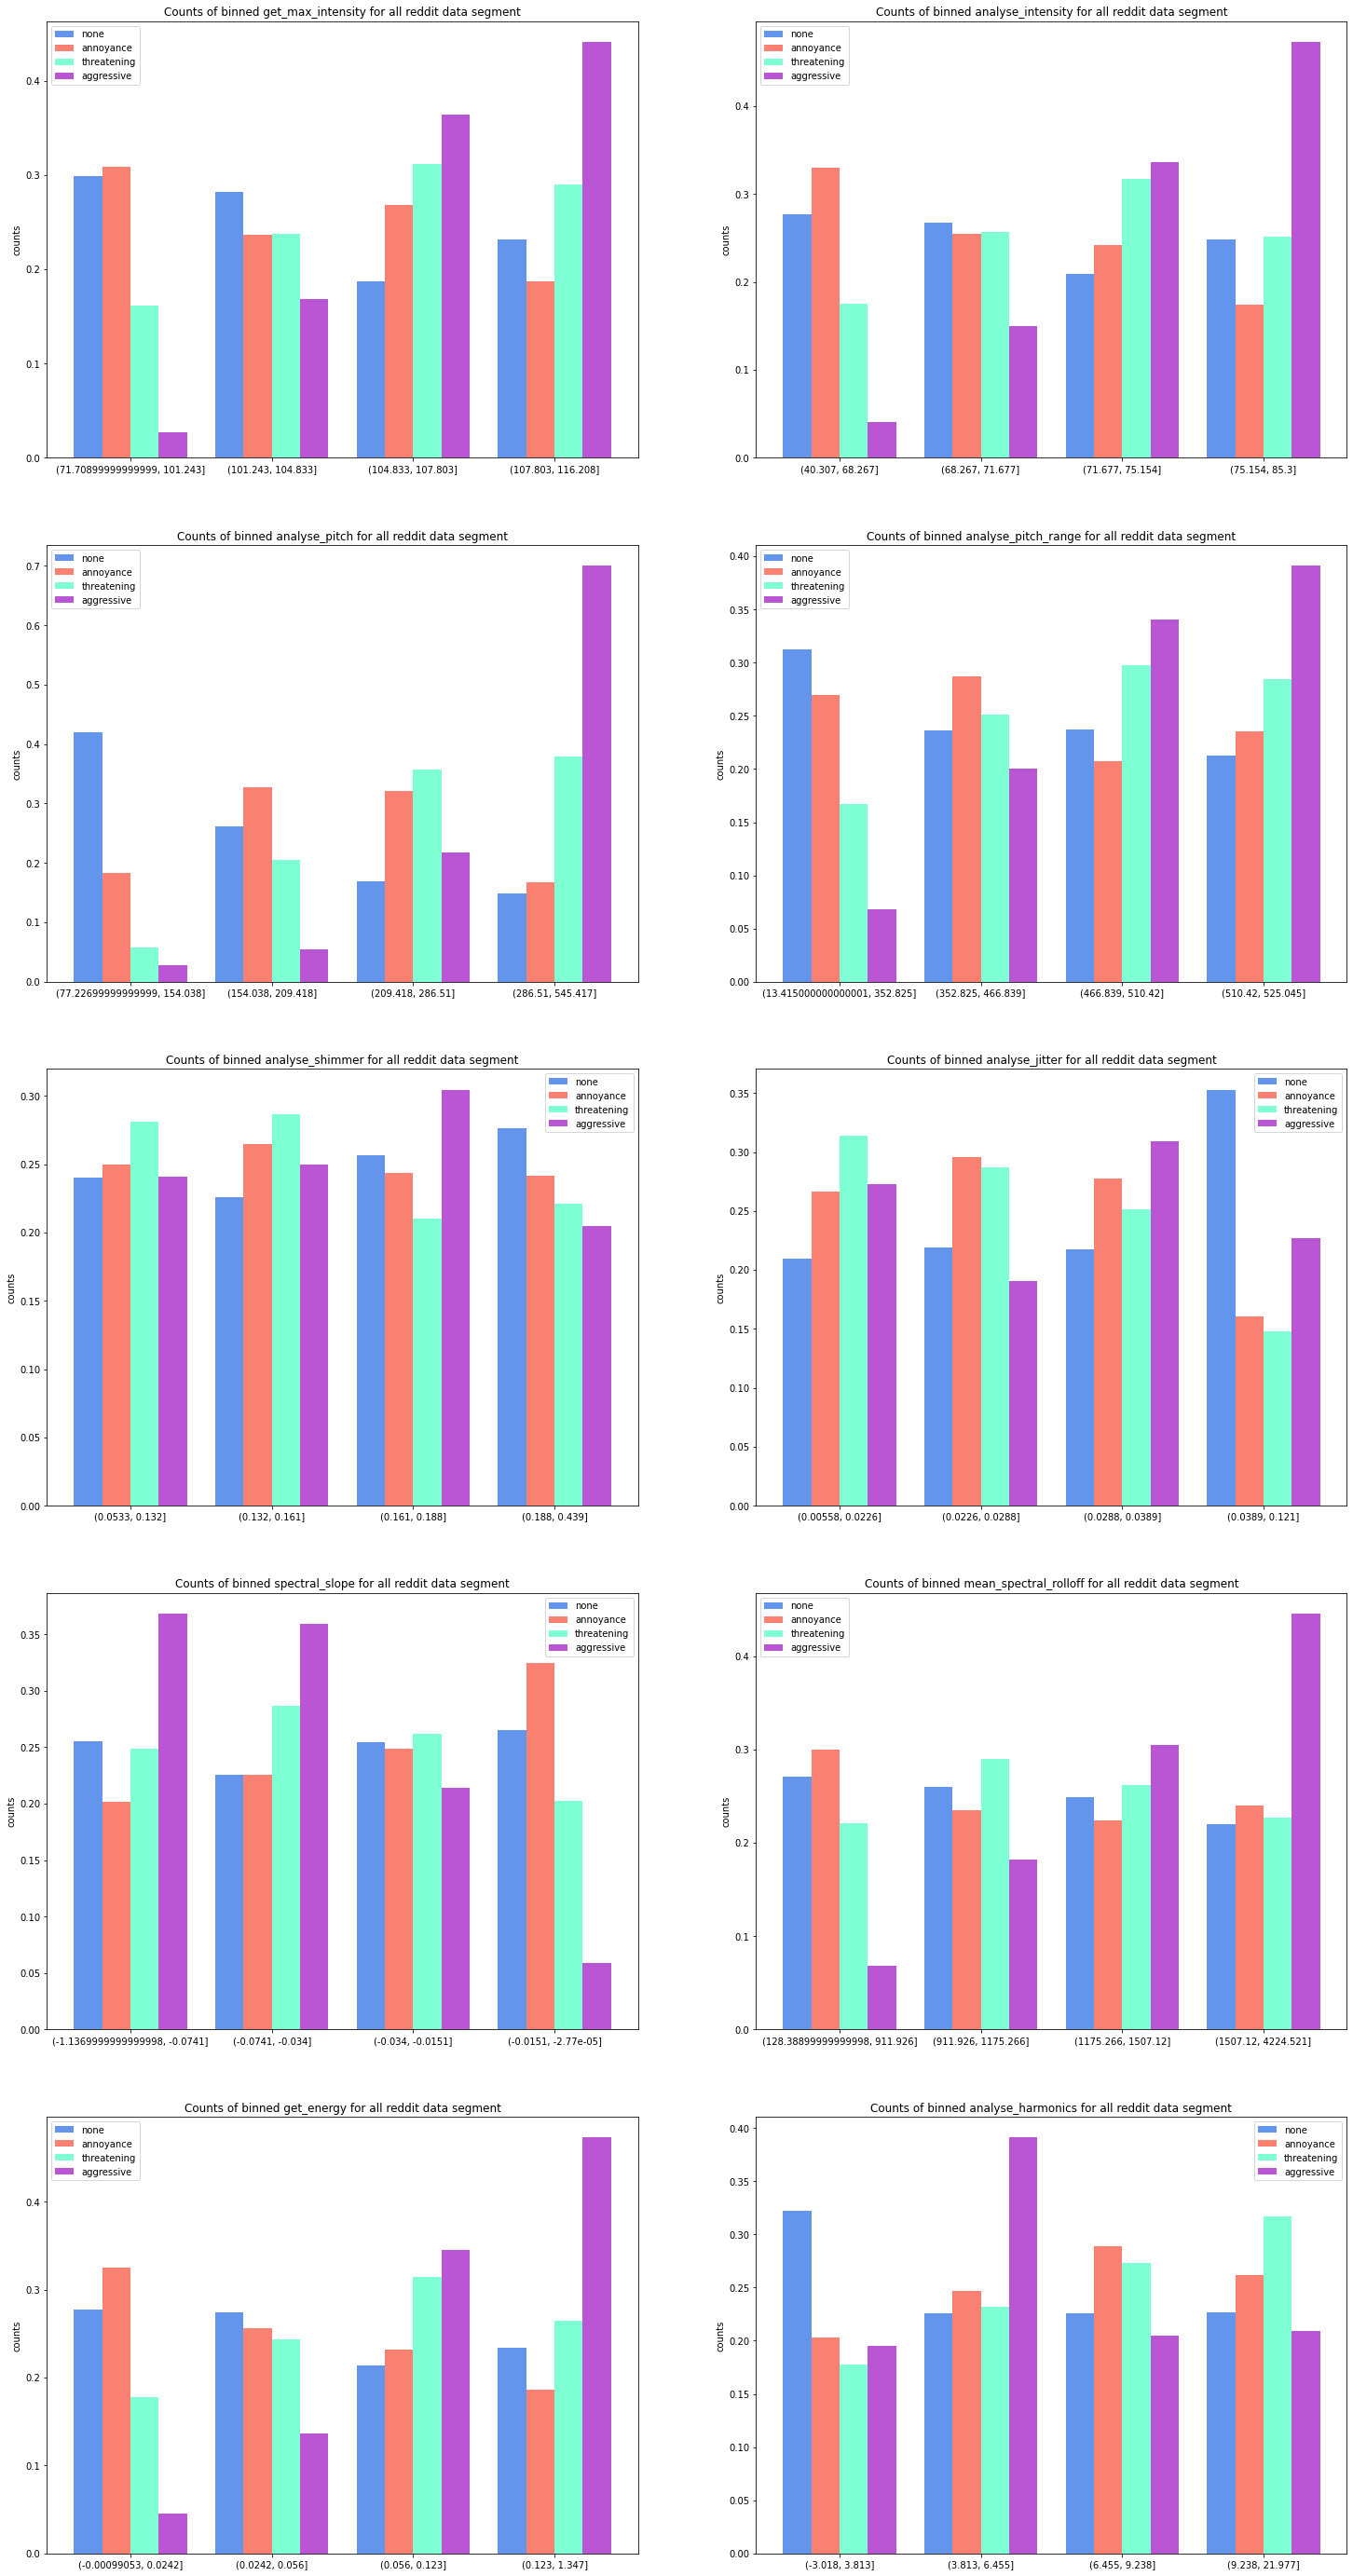

In [12]:
barPlotDataframes(df_merged, 'all reddit data segment', 'segment')

parent

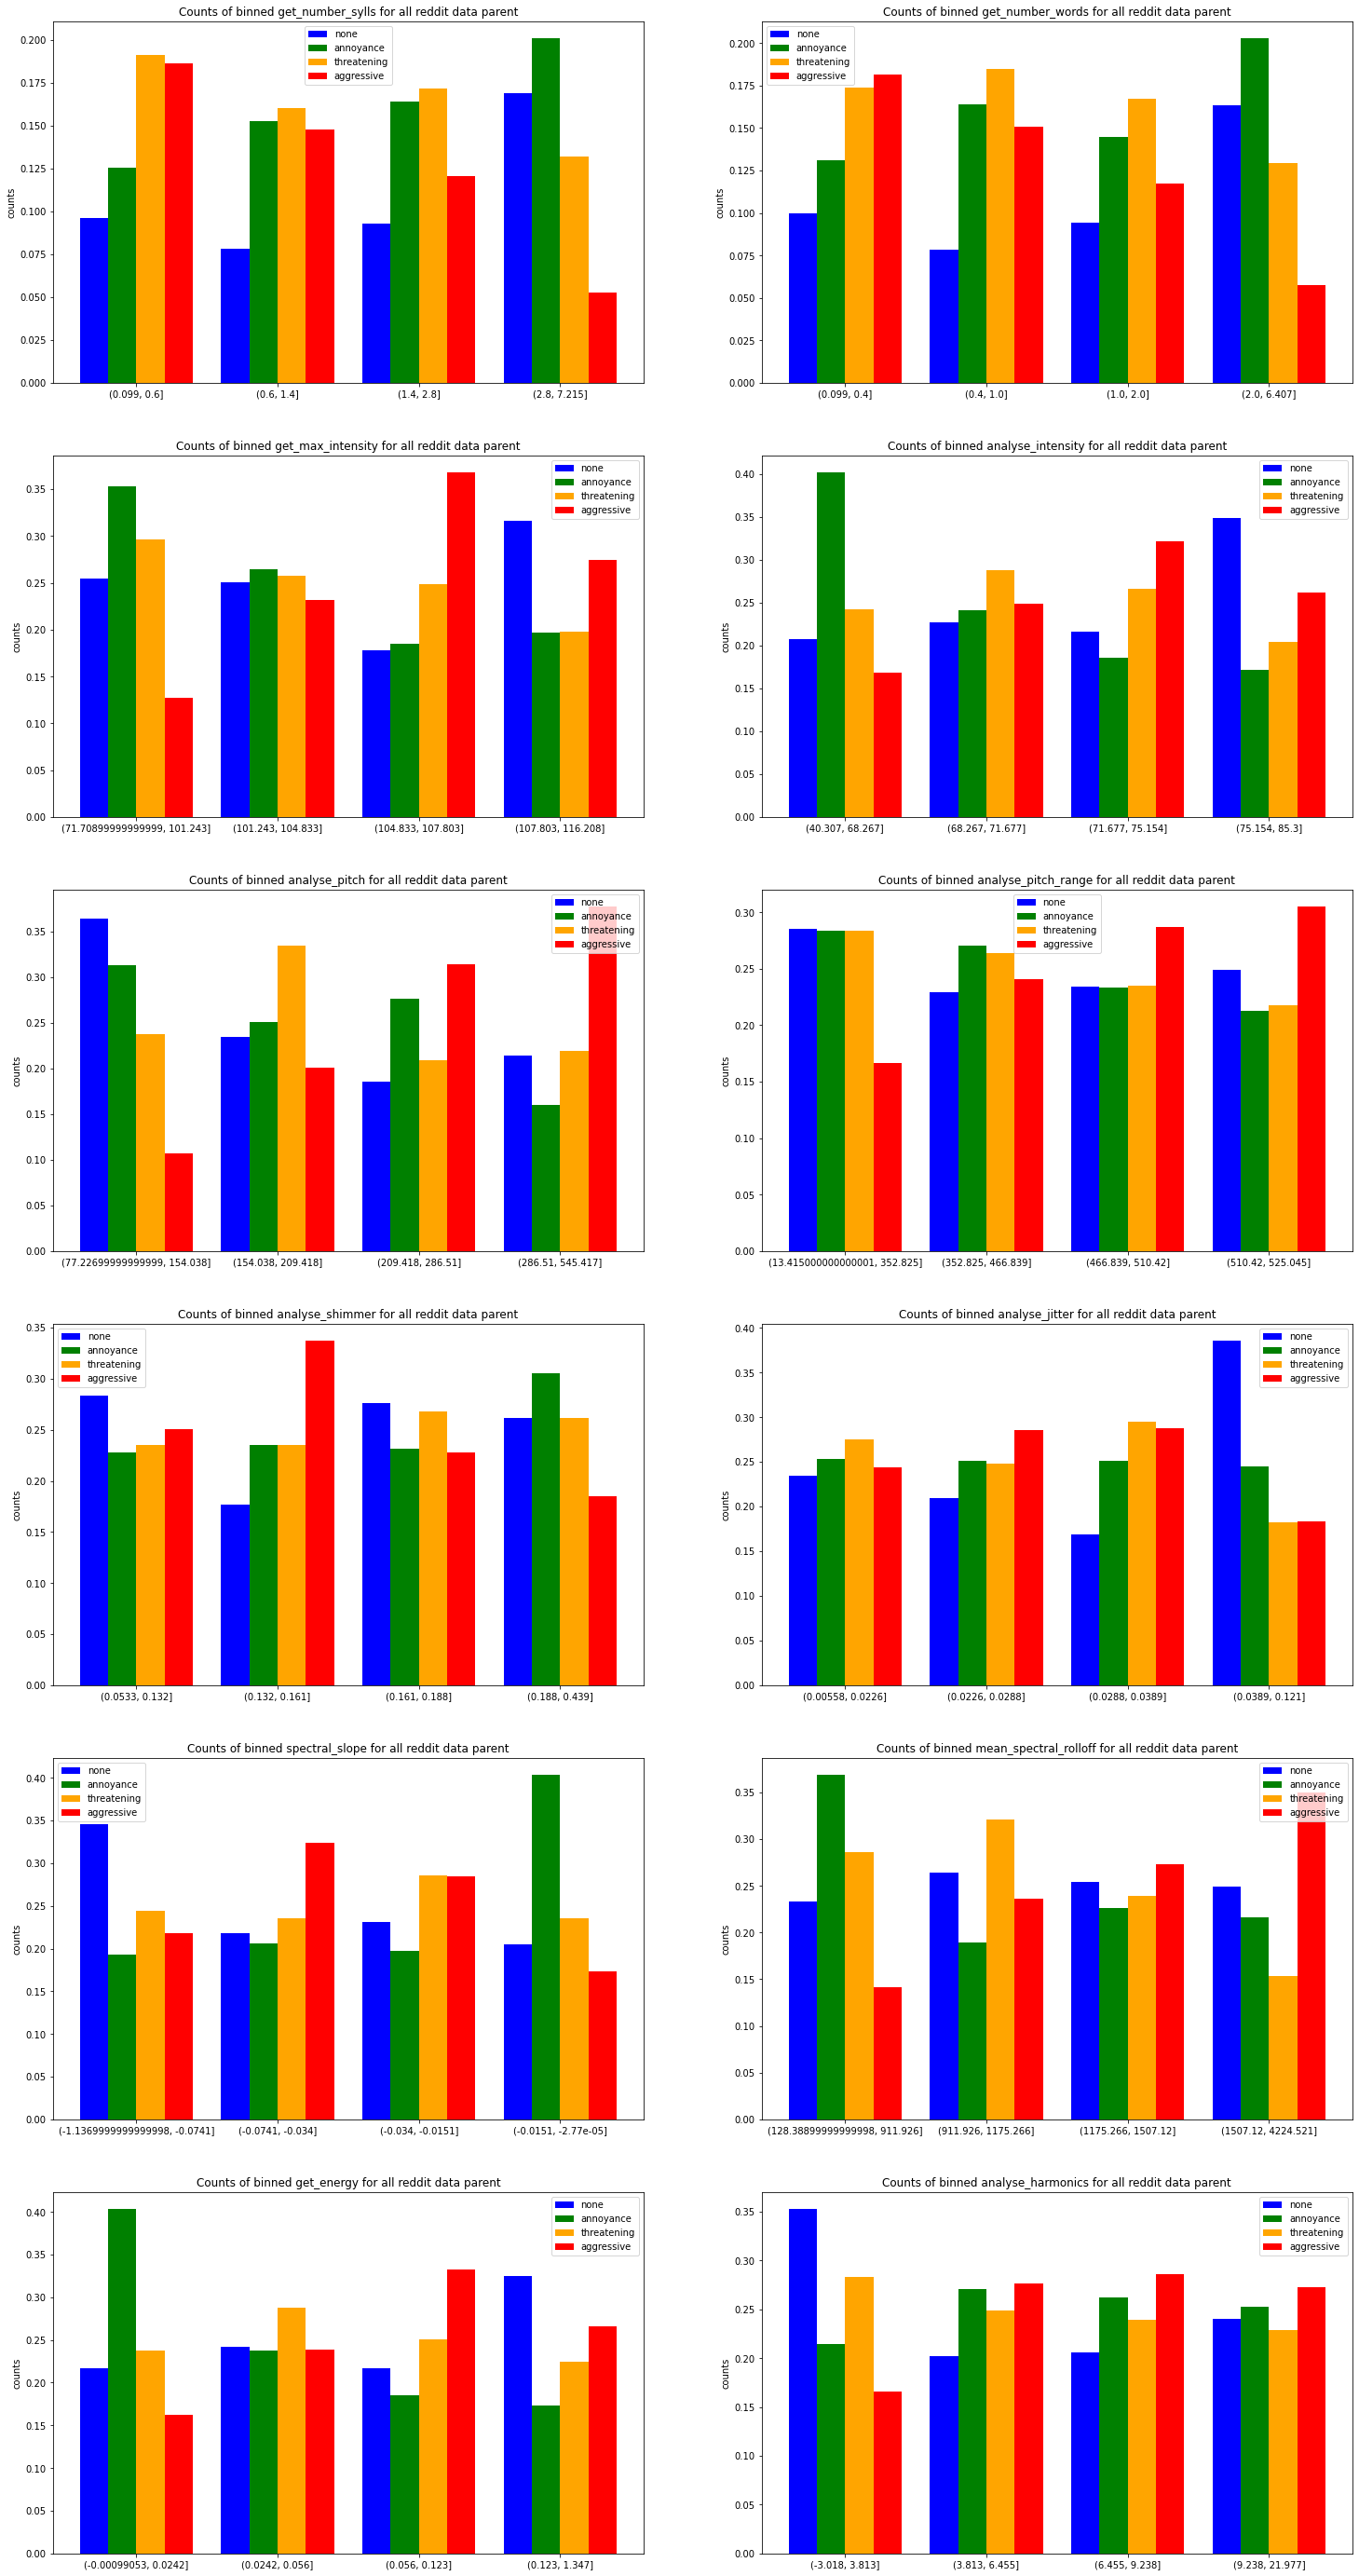

In [155]:
barPlotDataframes(df_merged, 'all reddit data parent', 'parent')

### No noise

In [4]:
no_noise = df_merged[df_merged.noisy_train != 1]

segment

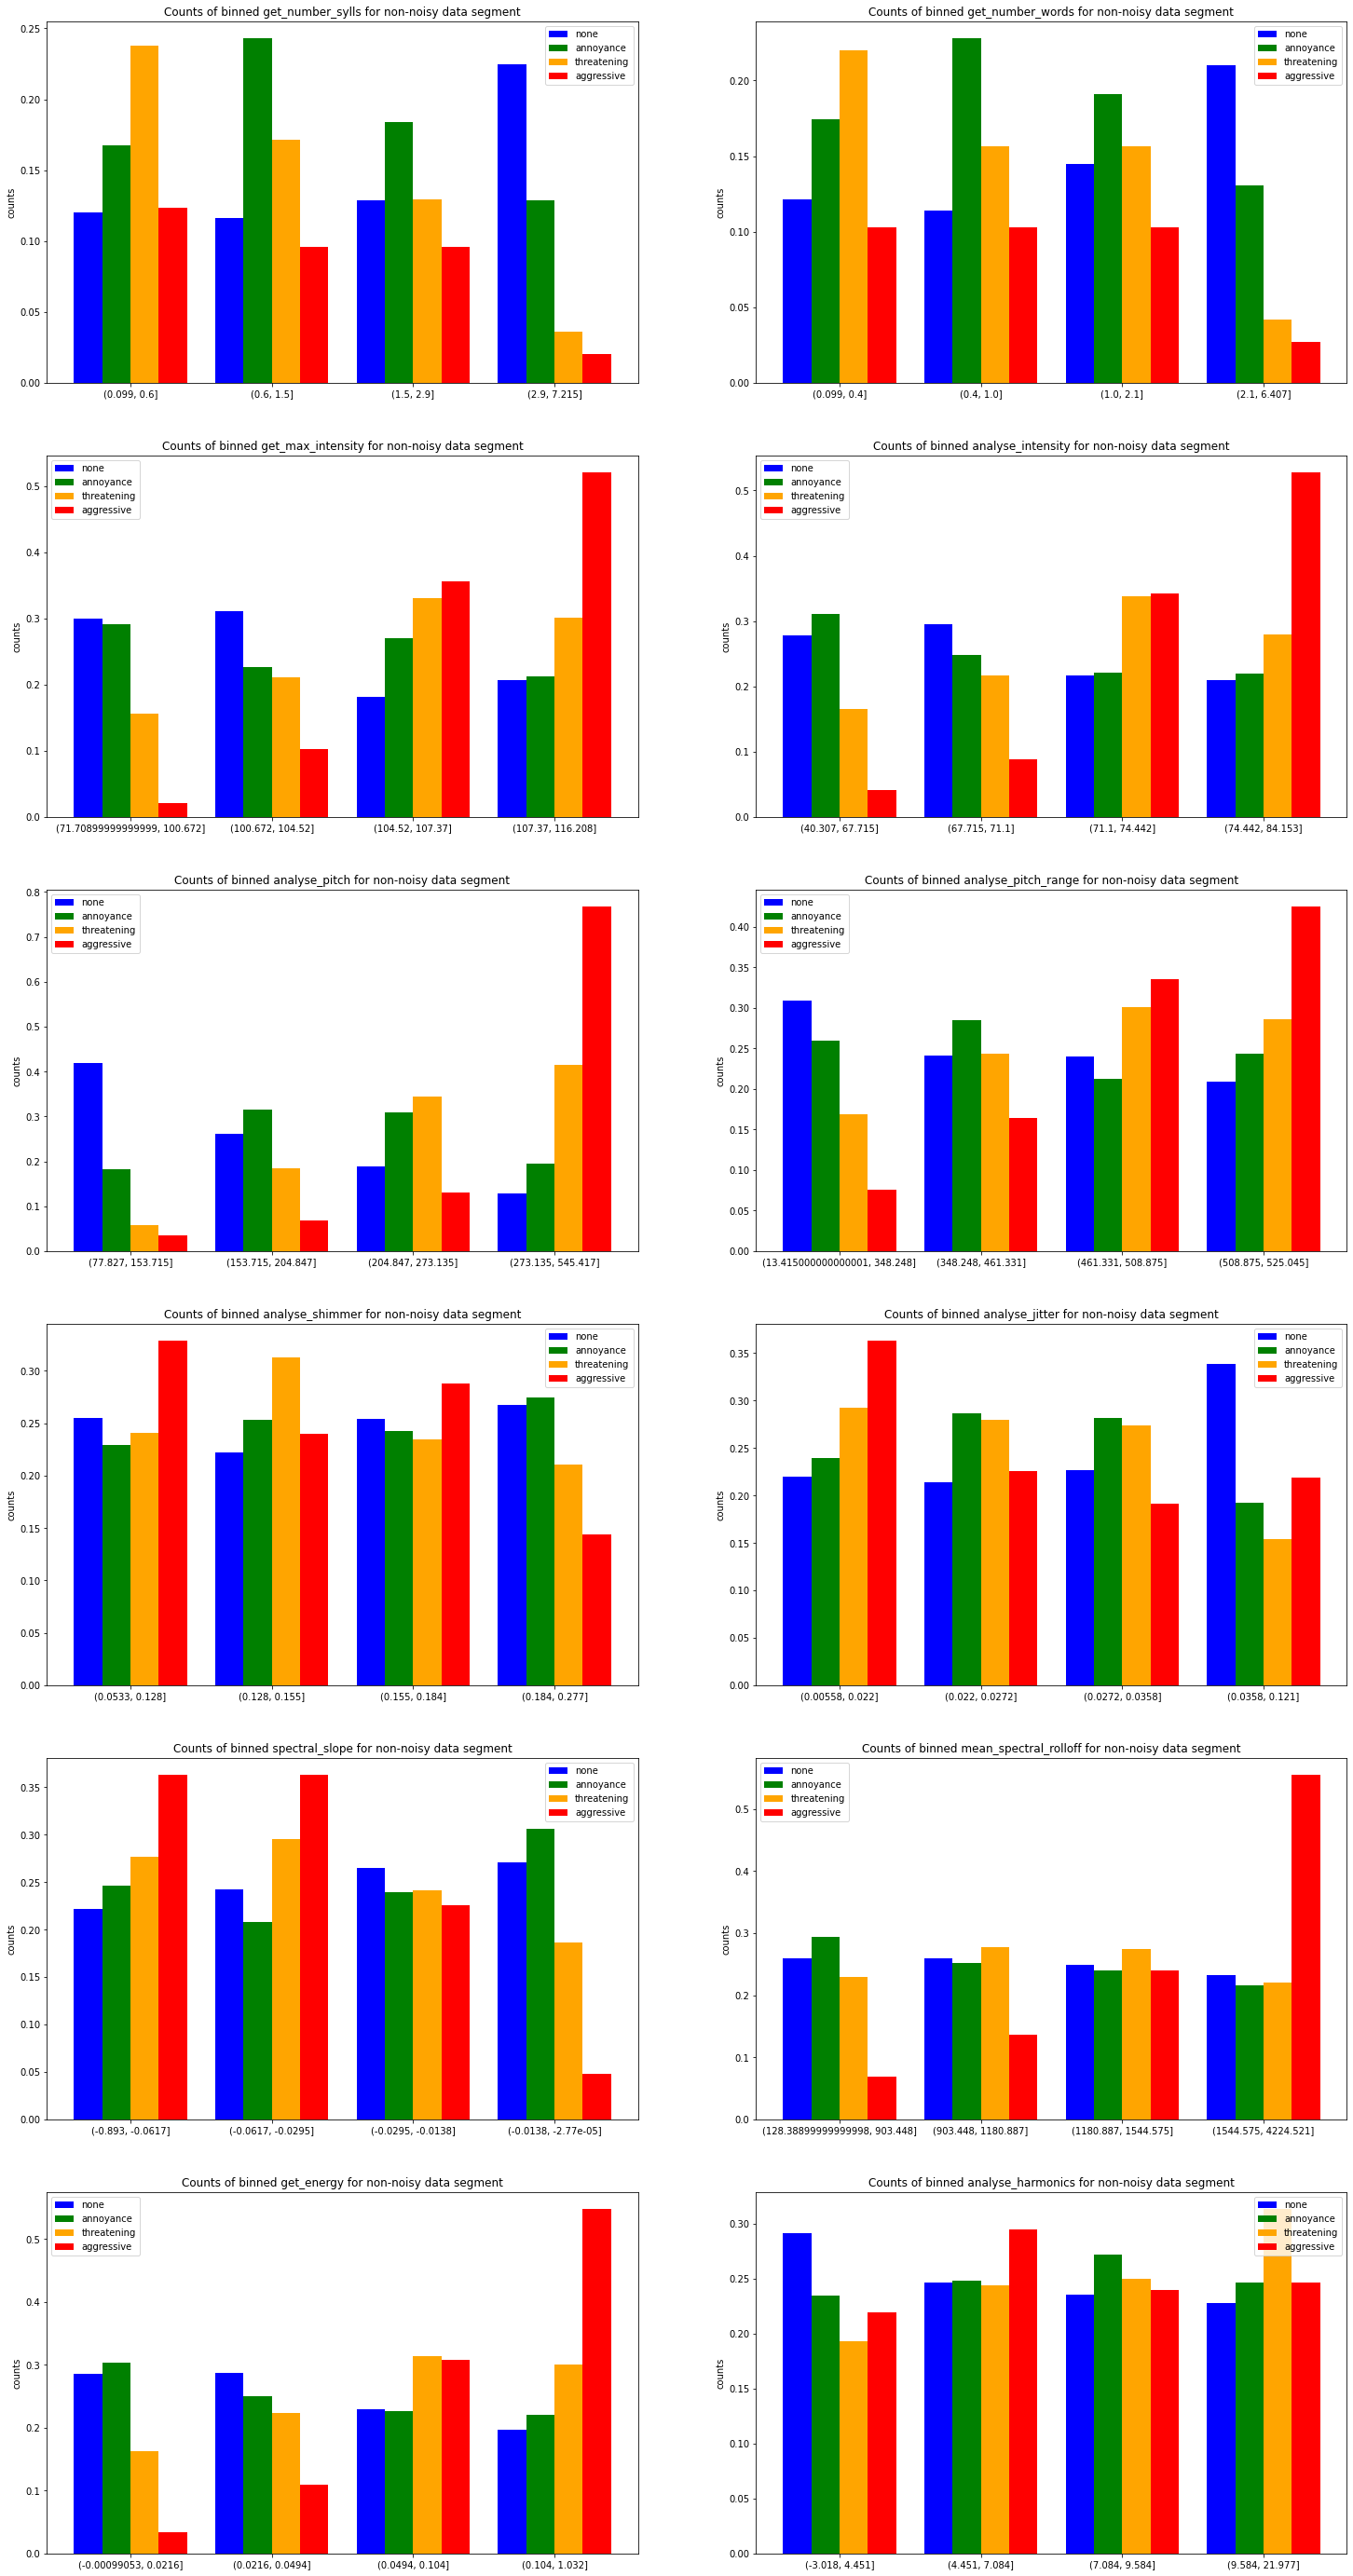

In [156]:
barPlotDataframes(no_noise, 'non-noisy data segment', 'segment')

parent

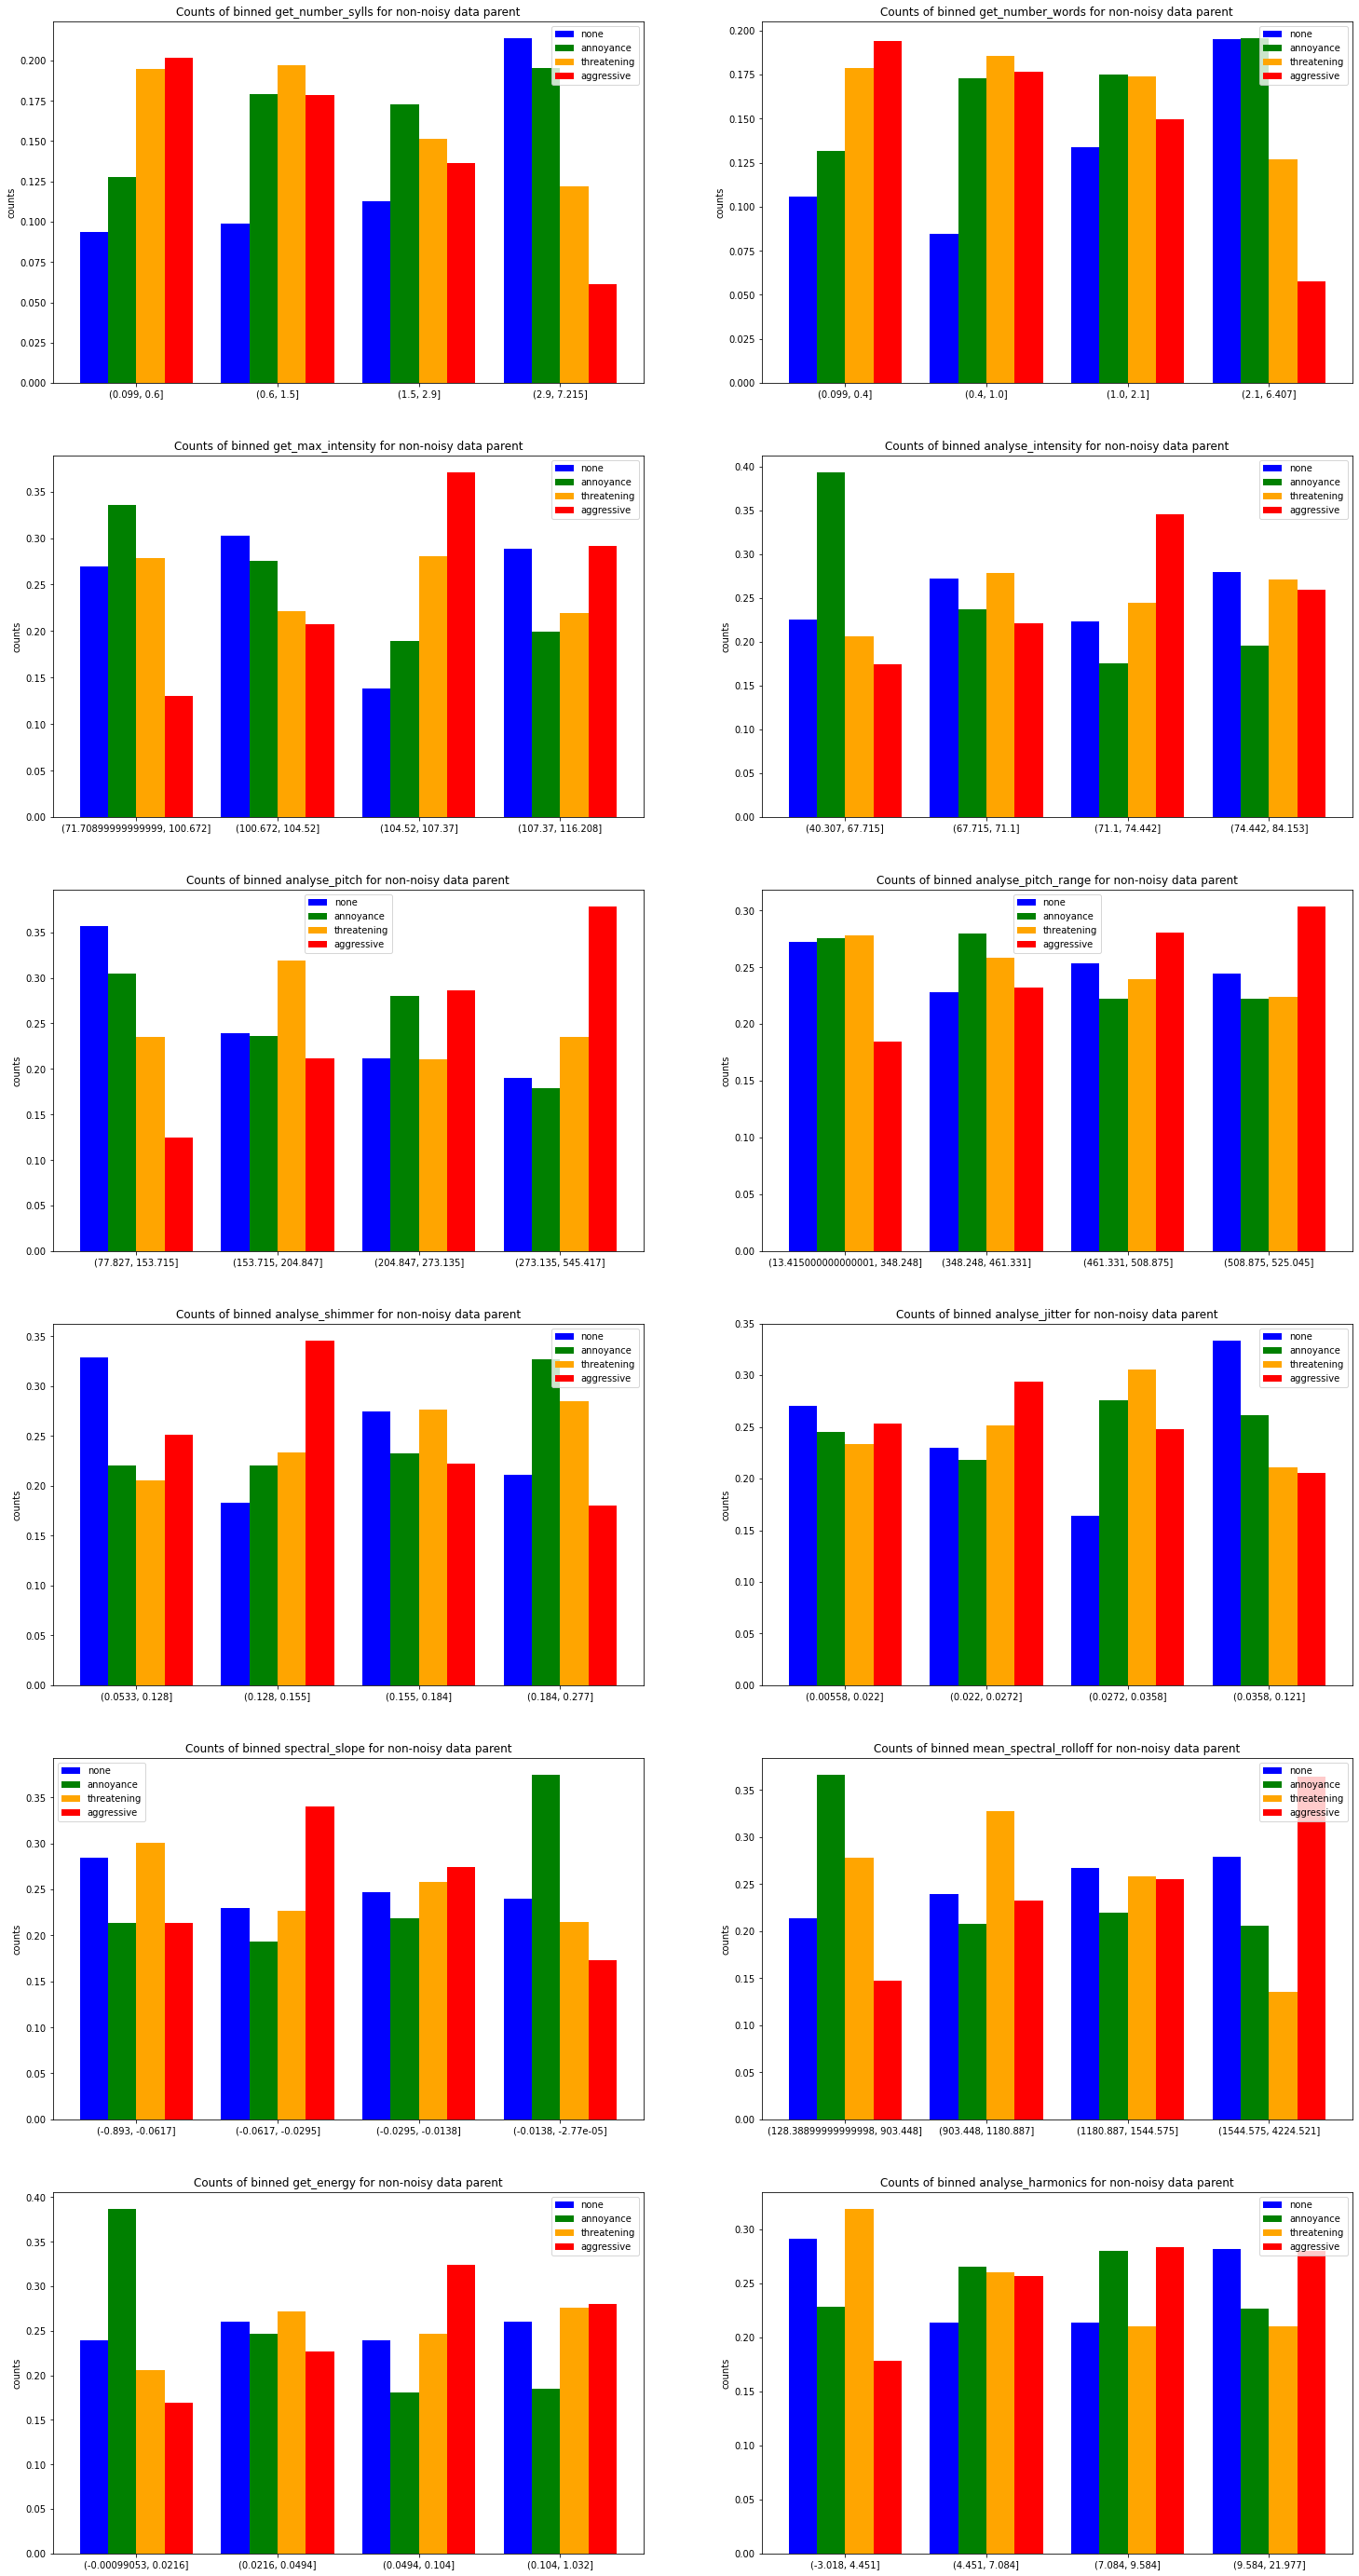

In [157]:
barPlotDataframes(no_noise, 'non-noisy data parent', 'parent')

### Noisy

segment

In [5]:
noise = df_merged[df_merged.noisy_train == 1]

segment

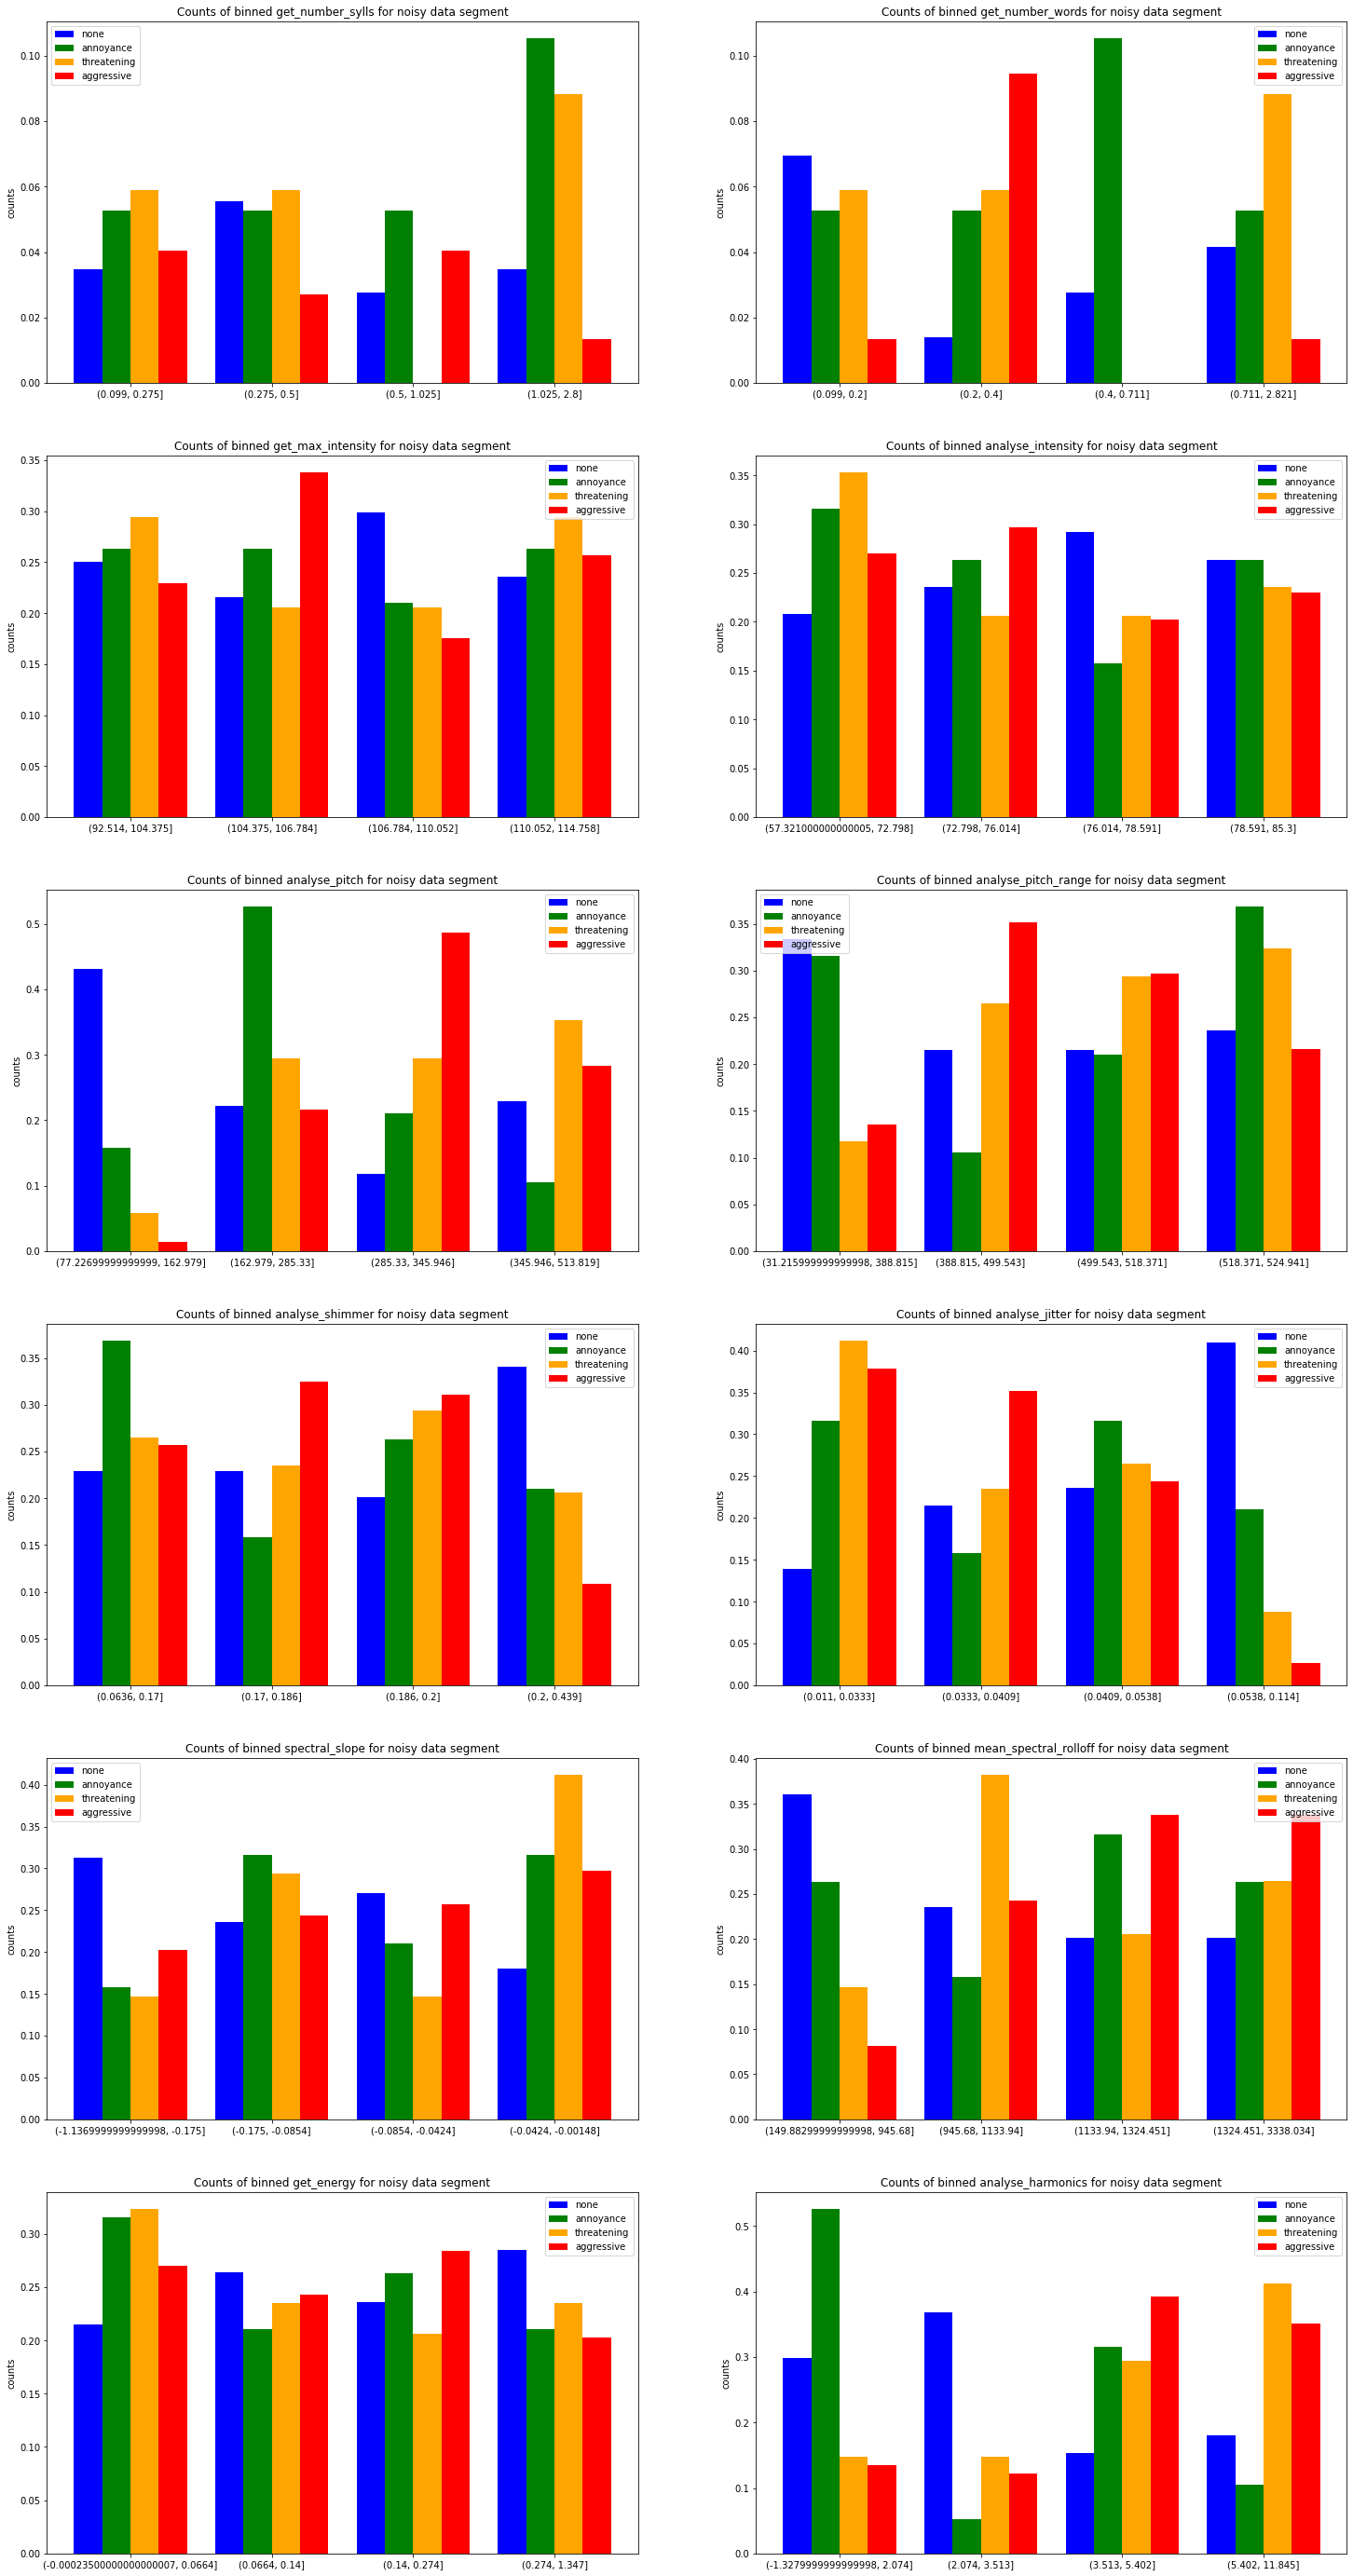

In [158]:
barPlotDataframes(noise, 'noisy data segment', 'segment')

parent

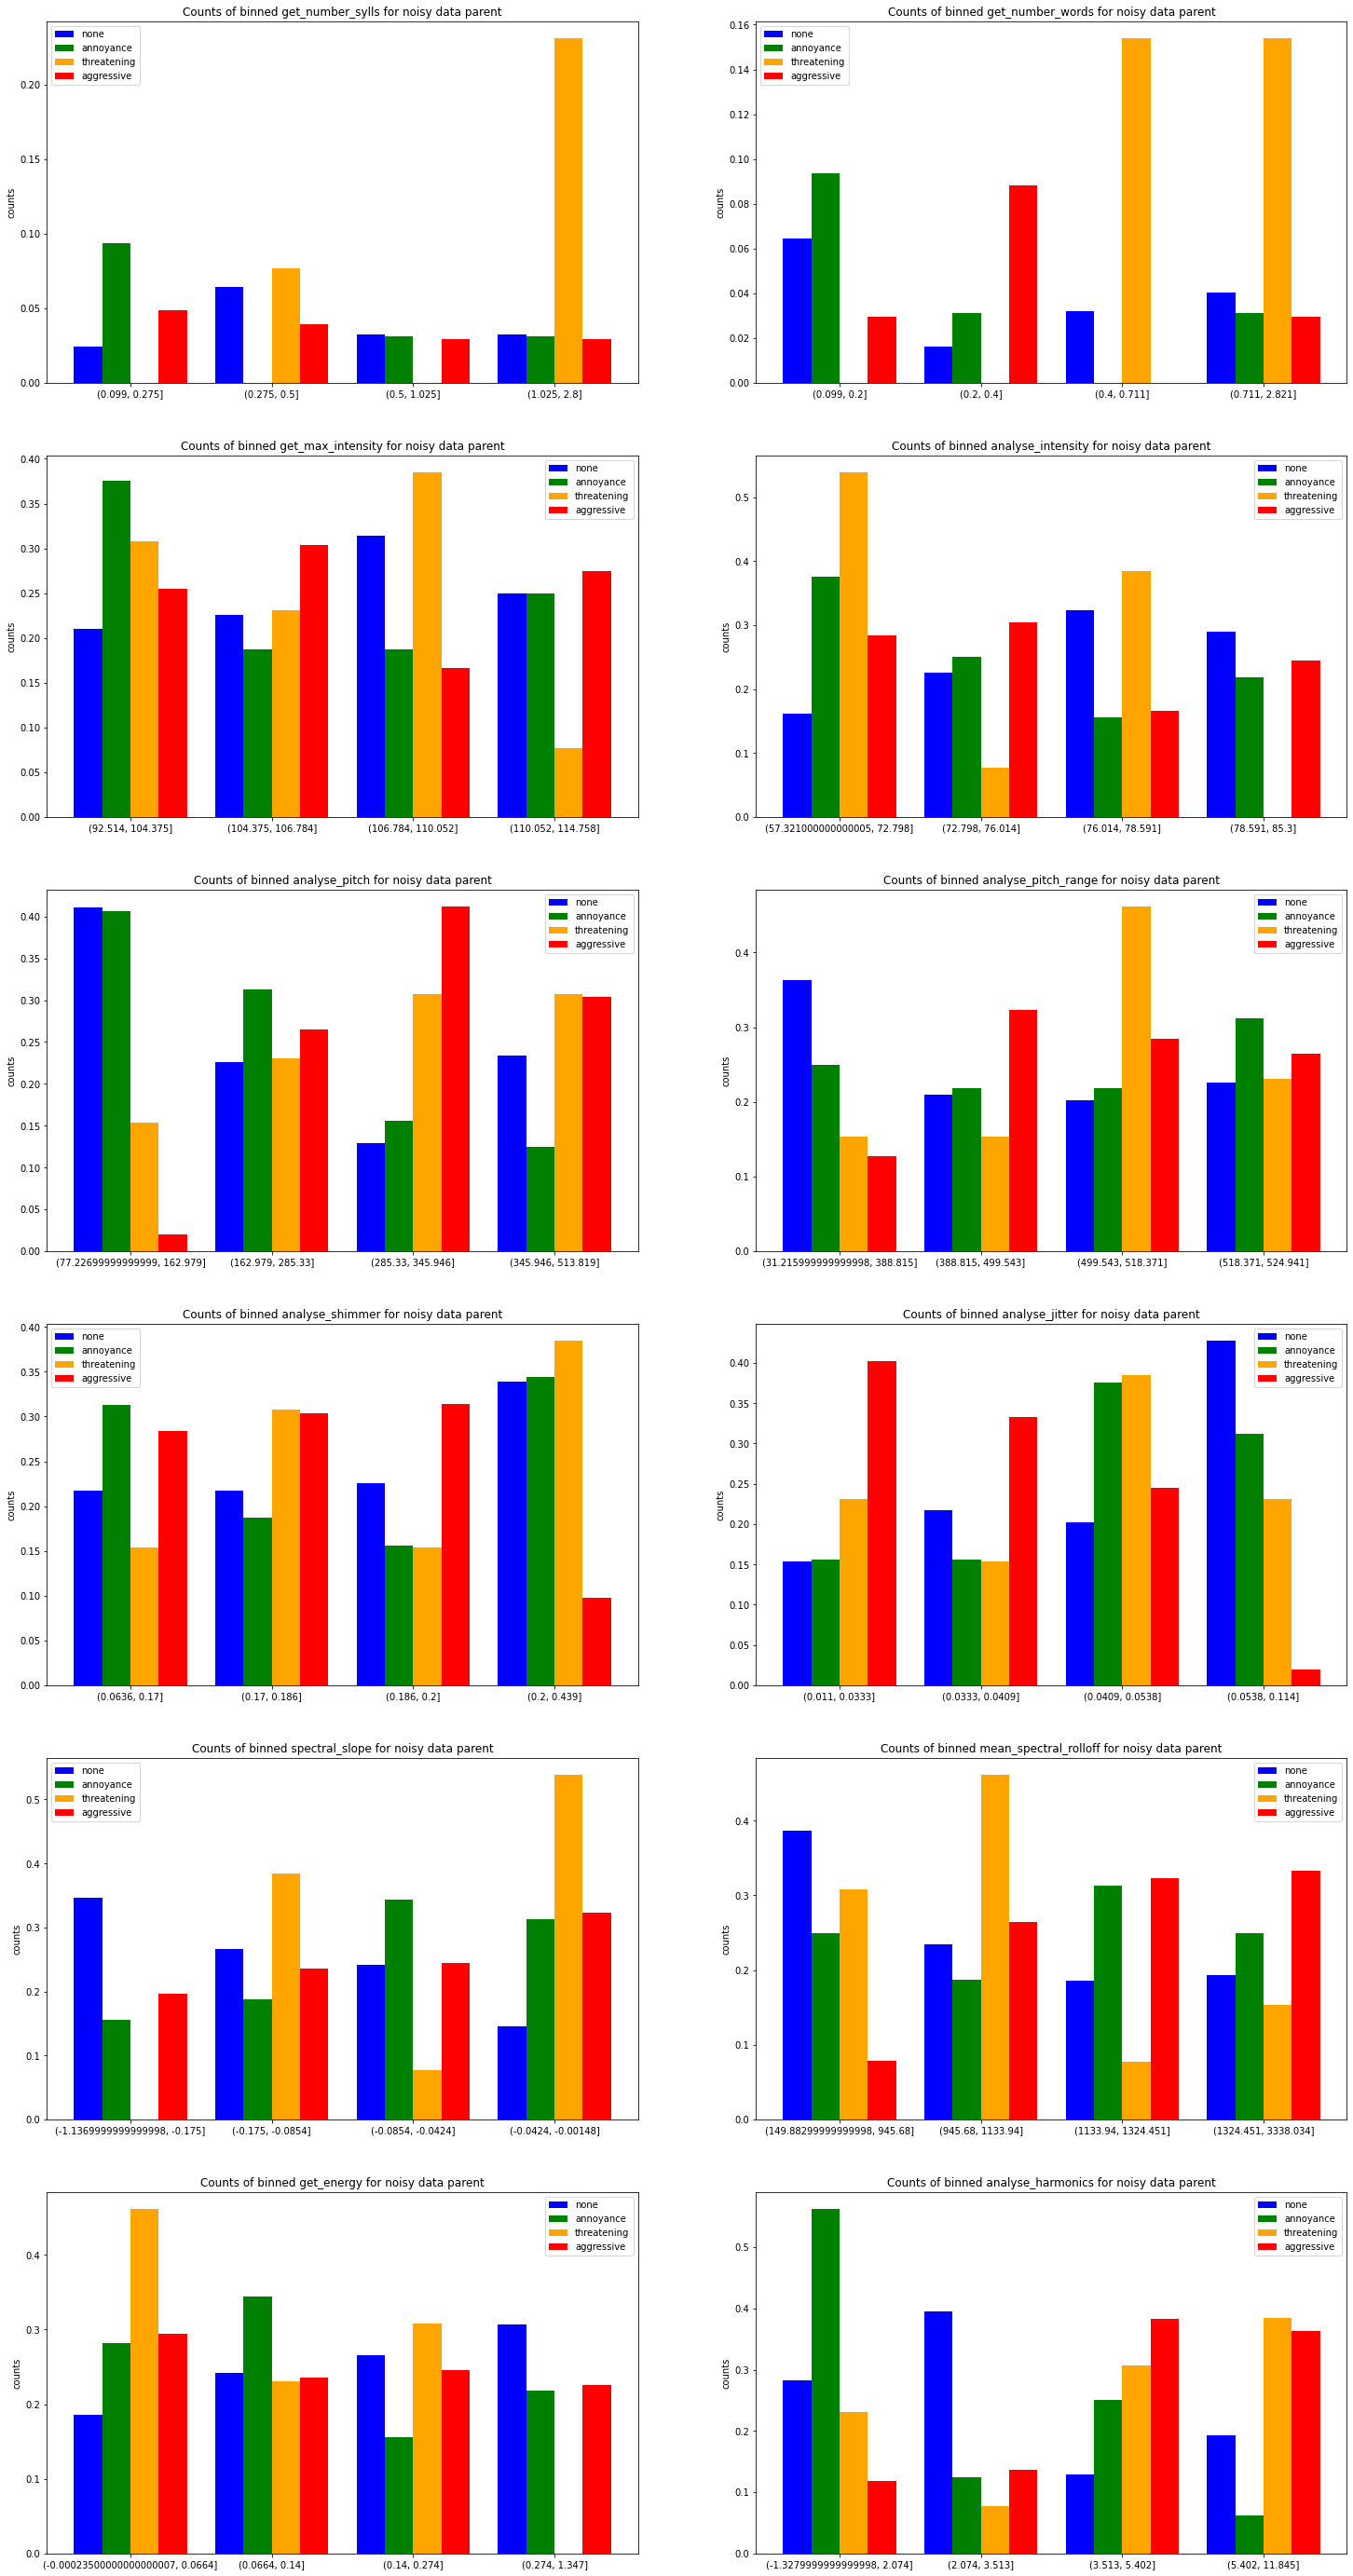

In [159]:
barPlotDataframes(noise, 'noisy data parent', 'parent')

## Radar plots

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler

In [75]:
def radarPlotDataframes(dataframe, dfname, type, min, max):

  categories = [	
  'max intensity',
  'avg intensity',
  'avg pitch',
  'pitch range',
  'shimmer',
  'jitter',
  'spectral slope',
  'spectral rolloff',
  'energy',
  'harmonics'
]

  ##scale the data
  for feature in features:
    scale = StandardScaler(copy = False)
    scale.fit_transform(dataframe[feature].to_numpy().reshape(-1, 1))
  
  temp_df = dataframe

  temp_df_0 = temp_df[temp_df[f'{type}_label_train'] == 0].dropna()
  temp_df_0 = temp_df_0.drop(['duration','file_name','parent_file_train','number_of_segments_train','number_of_voices_parent_train','extra_sounds_train','parent_label_train','segment_label_train','noisy_train','Notes_train'], axis=1).values.tolist()

  temp_df_1 = temp_df[temp_df[f'{type}_label_train'] == 1].dropna()
  temp_df_1 = temp_df_1.drop(['duration','file_name','parent_file_train','number_of_segments_train','number_of_voices_parent_train','extra_sounds_train','parent_label_train','segment_label_train','noisy_train','Notes_train'], axis=1).values.tolist()

  temp_df_2 = temp_df[temp_df[f'{type}_label_train'] == 2].dropna()
  temp_df_2 = temp_df_2.drop(['duration','file_name','parent_file_train','number_of_segments_train','number_of_voices_parent_train','extra_sounds_train','parent_label_train','segment_label_train','noisy_train','Notes_train'], axis=1).values.tolist()

  temp_df_3 = temp_df[temp_df[f'{type}_label_train'] == 3].dropna()
  temp_df_3 = temp_df_3.drop(['duration','file_name','parent_file_train','number_of_segments_train','number_of_voices_parent_train','extra_sounds_train','parent_label_train','segment_label_train','noisy_train','Notes_train'], axis=1).values.tolist()
  
  #create subplot layout
  fig = make_subplots(rows=1, cols=1, 
                      specs=[[{"type": "polar"}]],
                      subplot_titles=(f'{dfname}',))
  

  fig.add_trace(go.Scatterpolar(
        r=temp_df_0[0],
        theta=categories,
        fill='toself',
        name='none'),
        row = 1,
        col = 1
  )
  fig.add_trace(go.Scatterpolar(
        r=temp_df_1[0],
        theta=categories,
        fill='toself',
        name='annoyance'),
        row = 1,
        col = 1
  )
  fig.add_trace(go.Scatterpolar(
        r=temp_df_2[0],
        theta=categories,
        fill='toself',
        name='threatening'),
        row = 1,
        col = 1
  )
  fig.add_trace(go.Scatterpolar(
        r=temp_df_3[0],
        theta=categories,
        fill='toself',
        name='aggressive'),
        row = 1,
        col = 1
  )
  
  #change the size and layout, make margins smaller
  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        visible=True,
        range=[min, max]
      )
    ),
    margin=dict(l=0, r=0, t=100, b=50),
    showlegend=True,
    autosize=False,
    width=1200, height = 1000,
    legend=dict(
      x=0,
      y=1,
      traceorder="reversed",
      font=dict(
          size=10,
          color="black"
      )
    )
  )
  
  #add titles
  fig.update_annotations(y=1.05,
                         selector={'text':f'{dfname}'},
                         font={'size': 20})
  
  fig.show()

In [103]:
radarPlotDataframes(df_merged, 'All video voices', 'segment', -1.3, 2.1)

In [109]:
radarPlotDataframes(df_merged, 'All video voices', 'parent', -3.1, 1.4 )

In [86]:
radarPlotDataframes(no_noise, 'All video voices', 'segment', -1.3, 3.5)

In [104]:
radarPlotDataframes(no_noise, 'All video voices', 'parent', -3.1, 3 )

In [108]:
radarPlotDataframes(noise, 'All video voices', 'segment',-2.3, 1.8)

In [107]:
radarPlotDataframes(noise, 'All video voices', 'parent', -2.3, 1.9)